#Importing Libraries

In [ ]:
import pandas as pd #data processing
import numpy as np #linear algebra
import matplotlib.pyplot as plt #plots

#Loading the dataset

In [ ]:
Train = pd.read_csv('/content/train (5).csv')
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
Train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#Accessing information from the dataset

In [ ]:
#checking for info
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#checking for the number of rows and columns
Train.shape

(891, 12)

In [ ]:
#checking for data types
Train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
#seeing if we have duplicated values
Train.duplicated().sum()

0

In [ ]:
#checking if we have missing values
Train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Checking for Anomalies/outliers
Q1 = Train.quantile(0.25)
Q3 = Train.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
((Train < (Q1 - 1.5 * IQR)) | (Train > (Q3 + 1.5 * IQR))).sum()

Age             11
Cabin            0
Embarked         0
Fare           116
Name             0
Parch          213
PassengerId      0
Pclass           0
Sex              0
SibSp           46
Survived         0
Ticket           0
dtype: int64

* The dataset does not have duplicated values
* The dataset contains missing values
* The dataset has outliers

#Data Cleaning

In [ ]:
# filling null values in the age column with the age mean
Train['Age'] = Train['Age'].fillna(value = Train['Age'].mean())

In [ ]:
Train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#filling null values in the cabin column with mode
Train['Cabin'].fillna(Train['Cabin'].mode()[0], inplace = True)

In [ ]:
Train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [ ]:
#dropping null values in the embarked column since they are not many
Train.dropna(subset = ['Embarked'], inplace=True)

In [ ]:
Train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
#Correcting Outliers, filtering out the outliers by keeping only valid values
Train = Train[~((Train < (Q1 - 1.5 * IQR)) |(Train > (Q3 + 1.5 * IQR))).any(axis=1)]
Train.shape

(598, 12)

In [ ]:
#Dropping irrelevant columns which contains no usefull information
Train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace=True)

In [ ]:
Train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q


#Univariate Analysis

In [ ]:
#counts of survivors and non survivors
Train['Survived'].value_counts()

0    420
1    178
Name: Survived, dtype: int64

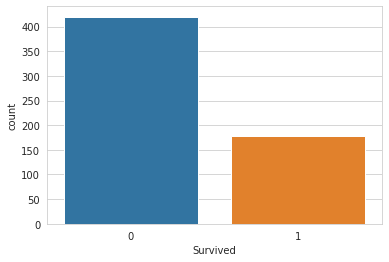

In [ ]:
#Visualising count of survivors
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(Train['Survived'])

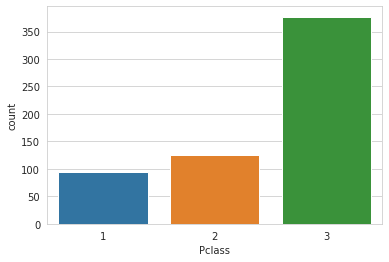

In [ ]:
sns.countplot(Train['Pclass'])

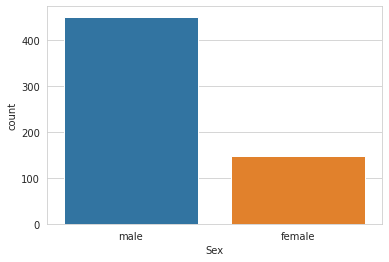

In [ ]:
sns.countplot(Train['Sex'])

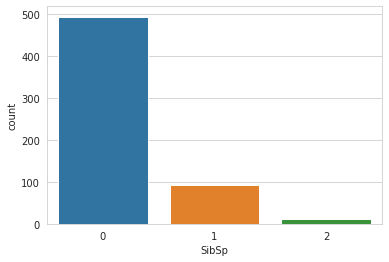

In [ ]:
sns.countplot(Train['SibSp'])

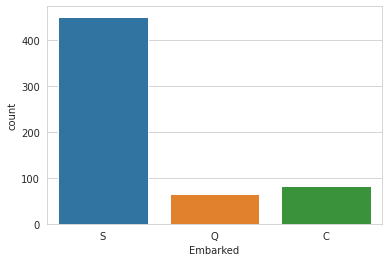

In [ ]:
sns.countplot(Train['Embarked'])

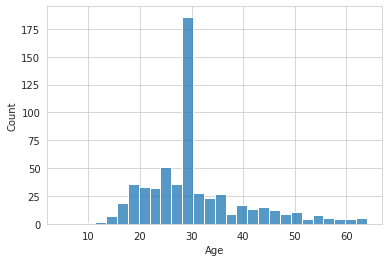

In [ ]:
sns.histplot(data = Train, x = 'Age')

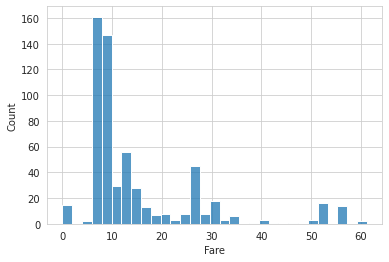

In [ ]:
sns.histplot(data = Train, x = 'Fare')

* The number of non survivors is higher compared to those who survived

* There is high number of third class passengers compared to first and second class

* There is more number of males than females

* Sibling Spouse(sibsp) 0 is higher compared to the rest

* Most passengers emberked from Southampton(S) compared to Cherbourg and Queenstown

#Bivariate Analysis

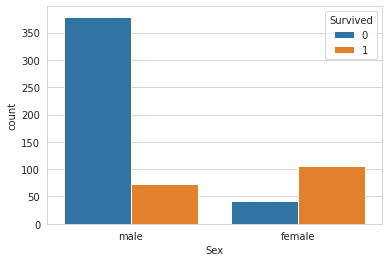

In [ ]:
sns.countplot(Train['Sex'], hue = Train['Survived'])

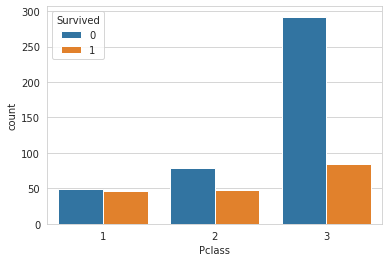

In [ ]:
sns.countplot(Train['Pclass'], hue = Train['Survived'])

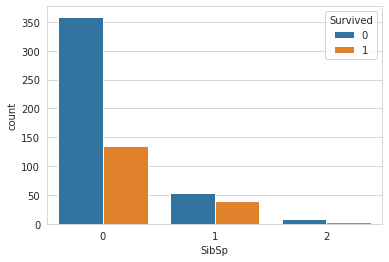

In [ ]:
sns.countplot(Train['SibSp'], hue = Train['Survived'])

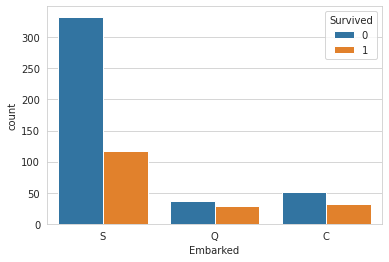

In [ ]:
sns.countplot(Train['Embarked'], hue = Train['Survived'])

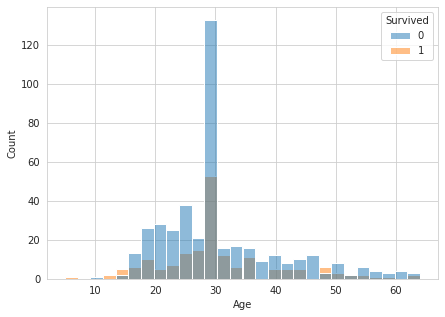

In [ ]:
plt.figure(figsize = (7,5))
sns.histplot(data = Train, x = 'Age', hue = 'Survived')

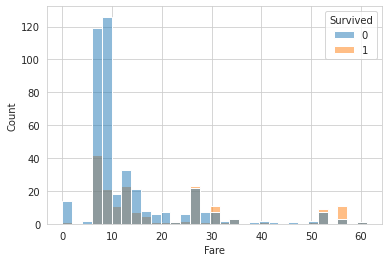

In [ ]:
sns.histplot(data = Train, x = 'Fare', hue = 'Survived')

* There is a higher number of male non survivors than females

* There is a higher number of third class passengers who did not survive compared to other classes

* Most passengers who did not survive embarked from southampton

* Most Sibling Spouse(SibSp) 0 did not survive compared to the rest

#Exploratory Data Analysis

Encoding Categorical data 

In [ ]:
#Performing feature engineering on our two categorical columns
Train['Sex'] = Train['Sex'].apply(lambda x:1 if x == 'female' else 0)

In [ ]:
Train['Embarked'] = Train['Embarked'].map({'S':1,'Q':2,'C':3})

In [ ]:
Train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,1
2,1,3,1,26.000000,0,0,7.9250,1
3,1,1,1,35.000000,1,0,53.1000,1
4,0,3,0,35.000000,0,0,8.0500,1
5,0,3,0,29.699118,0,0,8.4583,2


In [ ]:
Train.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

In [ ]:
Train.drop(['Parch'], axis = 1, inplace=True)

#Checking for Multicollinearity

In [ ]:
#Data pre-processing
X = Train.iloc[:, 1:].values
y = Train.iloc[:, 0].values

In [ ]:
print(X)

[[ 3.     0.    22.     1.     7.25   1.   ]
 [ 3.     1.    26.     0.     7.925  1.   ]
 [ 1.     1.    35.     1.    53.1    1.   ]
 ...
 [ 1.     1.    19.     0.    30.     1.   ]
 [ 1.     0.    26.     0.    30.     3.   ]
 [ 3.     0.    32.     0.     7.75   2.   ]]


In [ ]:
print(y)

[0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0
 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0
 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

x = add_constant(Train)

pd.Series([variance_inflation_factor(x.values, i)
for i in range(x.shape[1])], index=x.columns)

const       63.888291
Survived     1.529044
Pclass       2.177343
Sex          1.461621
Age          1.214708
SibSp        1.239770
Fare         2.266653
Embarked     1.022906
dtype: float64

* There is multicollinearity between variables in our dataset

#Multivariate Analysis

#Dimensionality Reduction(LDA)

In [ ]:
#Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(6, 2 - 1) = 1 components.
  ChangedBehaviorWarning)


#K Nearest Neighbor Classification

#Training K-NN model on the Training set

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(X_test)

#Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[69  7]
 [24 20]]


0.7416666666666667

*With K Nearest Neighbor we've managed to achieve an accuracy of 74% using default parameters